<a href="https://colab.research.google.com/github/Valentinasierra98/Proyecto_AL/blob/main/Pipeline_Final_Giraldo_Sierra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO FINAL PIPELINE
## Curso: Aprendizaje Automático  
### Maestría en Inteligencia Artificial y Ciencia de Datos  

---

## Elaborado por:  
- **Jahir Alberto Giraldo (22500239)**  
- **Valentina Sierra Caña (22500212)**  

---

El presente proyecto tiene como objetivo aplicar técnicas de aprendizaje automático supervisado para resolver un problema de clasificación binaria utilizando el Bank Marketing Dataset. Este conjunto de datos contiene información de campañas de marketing telefónico realizadas por una entidad bancaria, y busca predecir si un cliente aceptará o no una oferta de depósito a plazo.

Se realizará un análisis exploratorio del dataset, seguido de la selección de variables y la partición en conjuntos de entrenamiento, validación y prueba. Se implementarán y compararán modelos de clasificación como Regresión Logística, SVM, Árboles de Decisión y KNN, evaluando su rendimiento con métricas estándar y una adicional.

#Carga de Archivos

In [ ]:
from google.colab import files
files.upload()  # Subimos nuestro archivo kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"valentinasierracaa","key":"df26ca3be49ca4a101a8cd8cc1998b40"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d janiobachmann/bank-marketing-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset
License(s): CC0-1.0
  0% 0.00/142k [00:00<?, ?B/s]
100% 142k/142k [00:00<00:00, 339MB/s]


#FINALLLL

Cargando datos...

Variables numéricas: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Variables categóricas: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

Tamaños: Train=8929, Test=2233

Evaluando los modelos (Logistic Regression, Decision Tree, SVM)...

Evaluando Logistic Regression
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Mejores parámetros para Logistic Regression:
{'classifier__C': 10, 'classifier__solver': 'newton-cg'}

Métricas para Logistic Regression:
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1175
           1       0.80      0.83      0.81      1058

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233



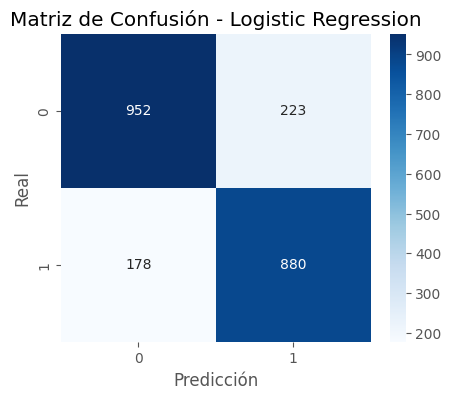


Evaluando Decision Tree
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Mejores parámetros para Decision Tree:
{'classifier__max_depth': 7, 'classifier__min_samples_split': 2}

Métricas para Decision Tree:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1175
           1       0.80      0.80      0.80      1058

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



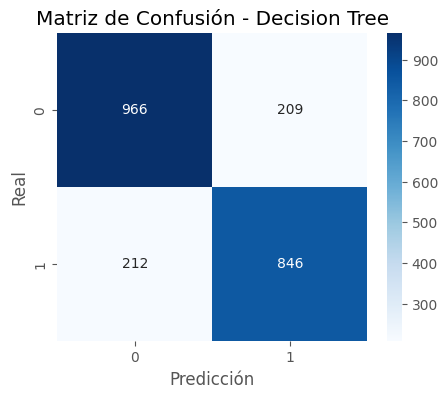


Evaluando SVM
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Mejores parámetros para SVM:
{'classifier__C': 10, 'classifier__kernel': 'rbf', 'feature_selection__k': 15}

Métricas para SVM:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1175
           1       0.80      0.88      0.84      1058

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233



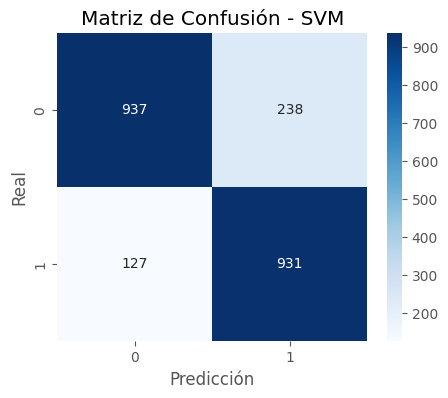


Comparación Visual de los Modelos:


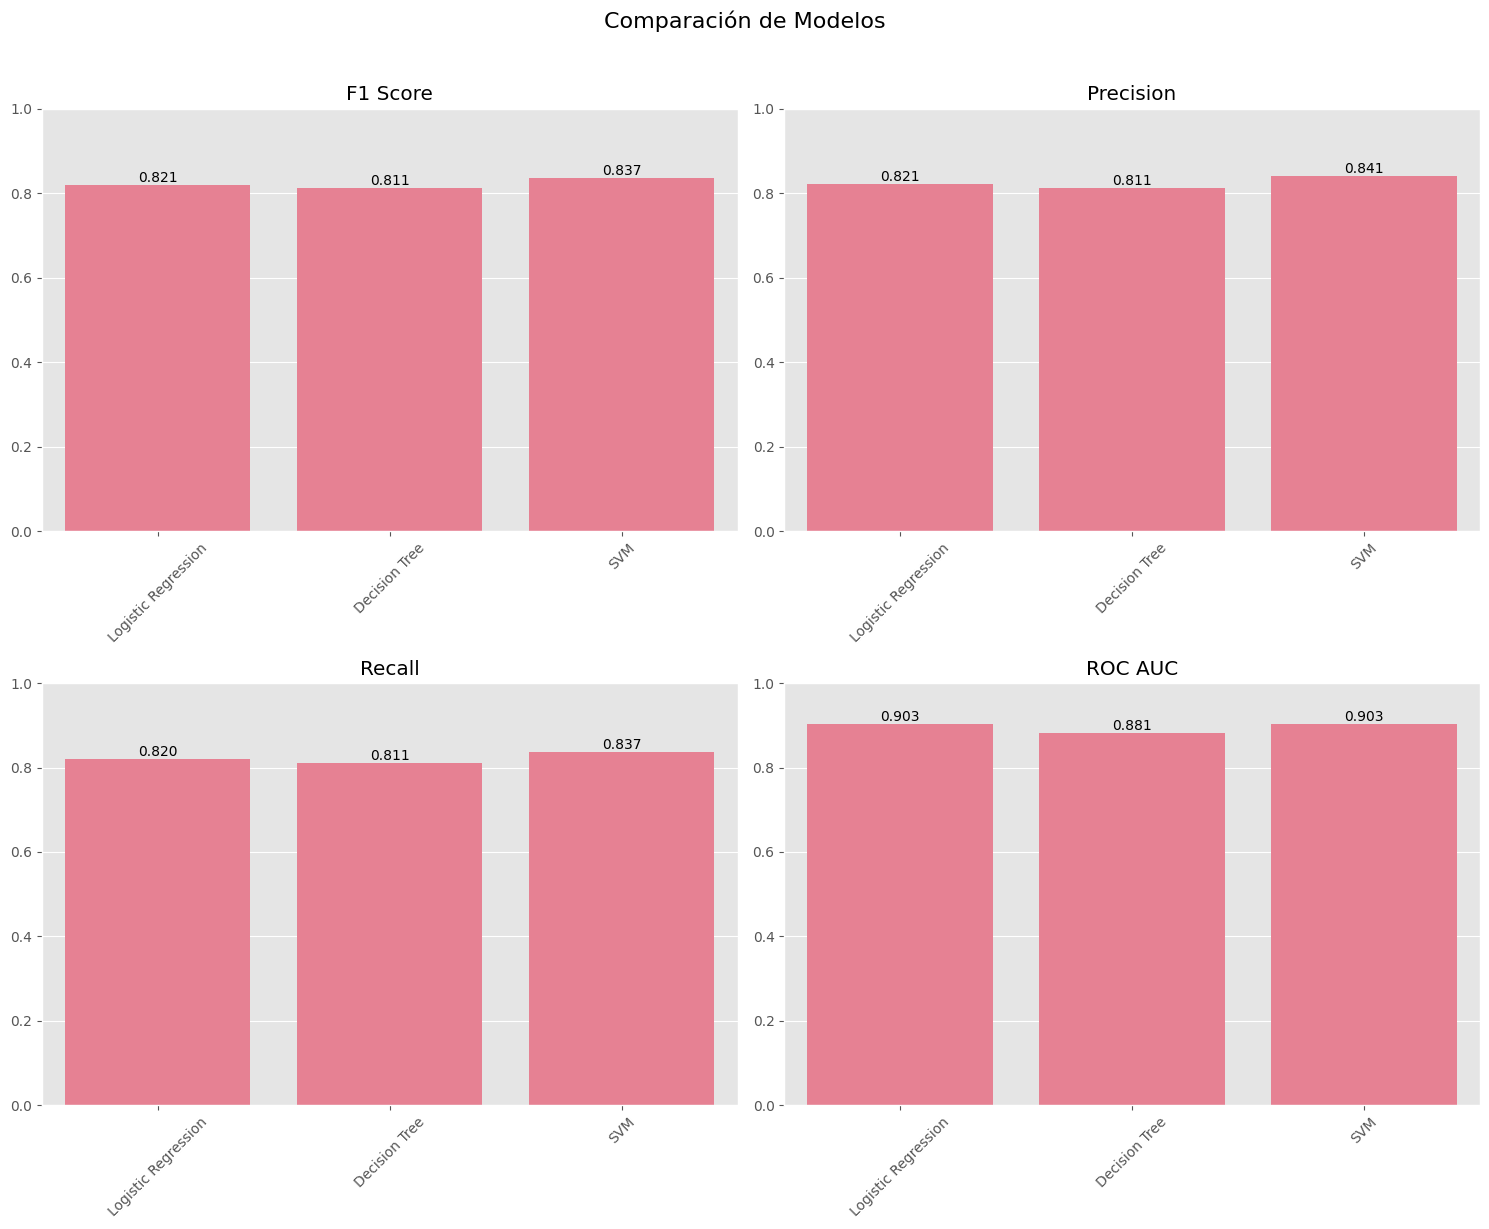


##################################################
MEJOR MODELO SELECCIONADO: SVM
##################################################
F1 Score: 0.8366
ROC AUC: 0.9030

Evaluación Detallada del Mejor Modelo:


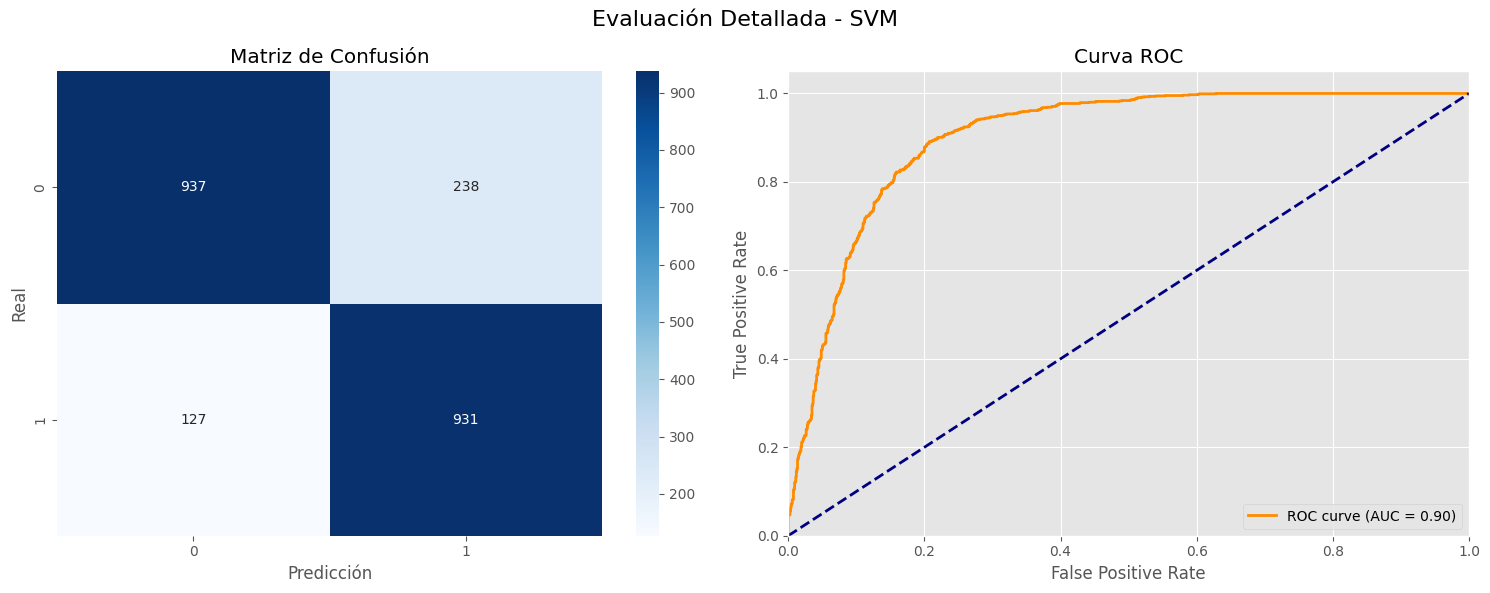


Métricas Clave:
F1 Score: 0.8366
Precision: 0.8407
Recall: 0.8365
ROC AUC: 0.9030

Estructura del Pipeline:


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('transformer',
                                                                   PowerTransformer())]),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome'])])),
                ('feature_selection', SelectKBest(k=15)),
                ('classifier',
                 SVC(C=10, class_weight='balanced', probability=True,
                     random_state=42))])


Guardando el mejor modelo...
Mejor modelo guardado como 'best_model.pkl'

Creando ensamblado con los 3 modelos...

Evaluación del Ensamblado:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1175
           1       0.81      0.86      0.84      1058

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import (classification_report, confusion_matrix,
                           roc_auc_score, roc_curve, auc,
                           precision_recall_curve, average_precision_score)
from sklearn import set_config
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from IPython.display import display, HTML

# Configuración
set_config(display='diagram')
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')
sns.set_palette("husl")

# =============================================
# 1. Funciones auxiliares
# =============================================

def load_data(filepath='bank.csv'):
    """Carga y prepara los datos"""
    df = pd.read_csv(filepath)
    df = df.drop_duplicates()
    df['deposit'] = df['deposit'].map({'no': 0, 'yes': 1})
    return df

def get_numeric_categorical_cols(df):
    """Identifica columnas numéricas y categóricas"""
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    if 'deposit' in numeric_cols:
        numeric_cols.remove('deposit')
    return numeric_cols, categorical_cols

# =============================================
# 2. Pipeline de preprocesamiento
# =============================================

def build_preprocessor(numeric_cols, categorical_cols):
    """Construye el pipeline de preprocesamiento"""
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('transformer', PowerTransformer(method='yeo-johnson'))
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])

    return preprocessor

# =============================================
# 3. Pipelines de modelos individuales (sin Random Forest)
# =============================================

def build_model_pipelines(preprocessor):
    """Construye pipelines para los 3 modelos"""
    models = {
        'Logistic Regression': {
            'pipeline': Pipeline([
                ('preprocessor', preprocessor),
                ('classifier', LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000))
            ]),
            'params': {
                'classifier__C': [0.01, 0.1, 1, 10],
                'classifier__solver': ['newton-cg', 'lbfgs']
            }
        },
        'Decision Tree': {
            'pipeline': Pipeline([
                ('preprocessor', preprocessor),
                ('classifier', DecisionTreeClassifier(random_state=42))
            ]),
            'params': {
                'classifier__max_depth': [3, 5, 7, None],
                'classifier__min_samples_split': [2, 5, 10]
            }
        },
        'SVM': {
            'pipeline': Pipeline([
                ('preprocessor', preprocessor),
                ('feature_selection', SelectKBest(score_func=f_classif)),
                ('classifier', SVC(class_weight='balanced', probability=True, random_state=42))
            ]),
            'params': {
                'classifier__C': [0.1, 1, 10],
                'classifier__kernel': ['linear', 'rbf'],
                'feature_selection__k': [10, 15]
            }
        }
    }
    return models

# =============================================
# 4. Visualización y evaluación comparativa
# =============================================

def plot_model_comparison(results):
    """Visualización comparativa de los 3 modelos"""
    metrics = ['F1 Score', 'Precision', 'Recall', 'ROC AUC']

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Comparación de Modelos', fontsize=16, y=1.02)

    for i, metric in enumerate(metrics):
        ax = axes[i//2, i%2]
        model_names = [res['Model'] for res in results]
        values = [res[metric] for res in results]

        bars = sns.barplot(x=model_names, y=values, ax=ax)
        ax.set_title(metric)
        ax.set_ylim(0, 1)
        ax.tick_params(axis='x', rotation=45)

        # Añadir valores en las barras
        for bar in bars.patches:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.3f}',
                    ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

def evaluate_all_models(models, X_train, y_train, X_test, y_test):
    """Evalúa todos los modelos y muestra resultados comparativos"""
    results = []
    best_models = {}

    for name, config in models.items():
        print(f"\n{'='*50}\nEvaluando {name}\n{'='*50}")

        # Búsqueda de hiperparámetros
        grid = GridSearchCV(
            config['pipeline'],
            config['params'],
            cv=StratifiedKFold(5),
            scoring='f1',
            n_jobs=-1,
            verbose=1
        )
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        best_models[name] = best_model

        # Evaluación
        y_pred = best_model.predict(X_test)
        y_proba = best_model.predict_proba(X_test)[:, 1]

        # Métricas
        report = classification_report(y_test, y_pred, output_dict=True)
        cm = confusion_matrix(y_test, y_pred)

        # Guardar resultados
        model_results = {
            'Model': name,
            'Best Params': grid.best_params_,
            'F1 Score': report['weighted avg']['f1-score'],
            'Precision': report['weighted avg']['precision'],
            'Recall': report['weighted avg']['recall'],
            'ROC AUC': roc_auc_score(y_test, y_proba),
            'Confusion Matrix': cm,
            'Model Object': best_model
        }
        results.append(model_results)

        # Mostrar resultados individuales
        print(f"\nMejores parámetros para {name}:")
        print(grid.best_params_)
        print(f"\nMétricas para {name}:")
        print(classification_report(y_test, y_pred))

        # Matriz de confusión
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Matriz de Confusión - {name}')
        plt.xlabel('Predicción')
        plt.ylabel('Real')
        plt.show()

    # Mostrar comparación visual
    print("\nComparación Visual de los Modelos:")
    plot_model_comparison(results)

    # Seleccionar el mejor modelo basado en F1 Score
    best_model_info = max(results, key=lambda x: x['F1 Score'])
    print(f"\n{'#'*50}\nMEJOR MODELO SELECCIONADO: {best_model_info['Model']}\n{'#'*50}")
    print(f"F1 Score: {best_model_info['F1 Score']:.4f}")
    print(f"ROC AUC: {best_model_info['ROC AUC']:.4f}")

    # Visualización detallada del mejor modelo
    print("\nEvaluación Detallada del Mejor Modelo:")
    evaluate_single_model(best_model_info, X_test, y_test)

    return results, best_model_info, best_models

def evaluate_single_model(model_info, X_test, y_test):
    """Evaluación detallada de un solo modelo"""
    model = model_info['Model Object']
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Gráficos
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle(f'Evaluación Detallada - {model_info["Model"]}', fontsize=16)

    # Matriz de confusión
    sns.heatmap(model_info['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', ax=ax1)
    ax1.set_title('Matriz de Confusión')
    ax1.set_xlabel('Predicción')
    ax1.set_ylabel('Real')

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    ax2.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('Curva ROC')
    ax2.legend(loc="lower right")

    plt.tight_layout()
    plt.show()

    # Reporte de métricas
    print("\nMétricas Clave:")
    print(f"F1 Score: {model_info['F1 Score']:.4f}")
    print(f"Precision: {model_info['Precision']:.4f}")
    print(f"Recall: {model_info['Recall']:.4f}")
    print(f"ROC AUC: {model_info['ROC AUC']:.4f}")

    # Mostrar pipeline del modelo
    print("\nEstructura del Pipeline:")
    display(model)

# =============================================
# 5. Función principal
# =============================================

def main():
    # 1. Cargar datos
    print("Cargando datos...")
    df = load_data()
    X = df.drop('deposit', axis=1)
    y = df['deposit']

    # 2. Identificar columnas
    numeric_cols, categorical_cols = get_numeric_categorical_cols(X)
    print(f"\nVariables numéricas: {numeric_cols}")
    print(f"Variables categóricas: {categorical_cols}")

    # 3. Dividir datos
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )
    print(f"\nTamaños: Train={X_train.shape[0]}, Test={X_test.shape[0]}")

    # 4. Construir preprocesador
    preprocessor = build_preprocessor(numeric_cols, categorical_cols)

    # 5. Construir pipelines de modelos (solo 3)
    models = build_model_pipelines(preprocessor)

    # 6. Evaluar todos los modelos y seleccionar el mejor
    print("\nEvaluando los modelos (Logistic Regression, Decision Tree, SVM)...")
    results, best_model_info, best_models = evaluate_all_models(
        models, X_train, y_train, X_test, y_test
    )

    # 7. Guardar el mejor modelo
    print("\nGuardando el mejor modelo...")
    joblib.dump(best_model_info['Model Object'], 'best_model.pkl')
    print("Mejor modelo guardado como 'best_model.pkl'")

    # 8. Opcional: Ensamblado de modelos
    print("\nCreando ensamblado con los 3 modelos...")
    ensemble = VotingClassifier(
        estimators=[(name, model) for name, model in best_models.items()],
        voting='soft',
        n_jobs=-1
    )
    ensemble.fit(X_train, y_train)

    print("\nEvaluación del Ensamblado:")
    y_pred = ensemble.predict(X_test)
    print(classification_report(y_test, y_pred))

if __name__ == "__main__":
    main()